Nick Videtti \
IST 718 - Big Data Analytics \
Lab 3 \
Summer 2023 \
\
&nbsp;&nbsp;&nbsp;&nbsp;This lab activity will take the fashion MNIST data from GitHub and use machine learning algorithms to try and predct the correct fashion item based on their corresponding images. \
&nbsp;&nbsp;&nbsp;&nbsp;Pandas DataFrames, Seaborn/PyPlot visualizations, SciKit Learn's Multinomial Naive Bayes, and SciKit Learn's Decision Tree will be used and compared in this lab activity. \
\
&nbsp;&nbsp;&nbsp;&nbsp;Also, the following questions will be answered: \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;o What is the accuracy of each method? \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;o What are the trade-offs of each approach? \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;o What is the compute performance of each approach?

First, data will need to be read in. The challenge here is that the format of the data are different than the ideal structured character-delimited data sets that are easy to load in. Luckily, a function to read in these data was provided in the same GitHub repository that the data were downloaded from. This function will be initialized in the code below.

In [47]:
#Function taken from GitHub to correctly load in fashion MNIST data in correct format
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

Now that the function is initialized, data will be read in. This process will have the user prompted to select the folder where the "data" folder is located. Inside the "data" folder should be the "fashion" folder, where the data files are located. There are 4 data files, one for training images, one for training labels, one for testing images, and one for testing labels. These will all be stored into objects that will be used to create some Pandas DataFrames in the following steps.

In [48]:
import tkinter.filedialog

#Get folder path where "data" folder is stored inside of it
path = tkinter.filedialog.askdirectory(title = 'Please Choose Folder Where "data" Folder is Located...')

#Read in data using load_mnist function
train_images, train_labels = load_mnist('data/fashion', kind='train')
test_images, test_labels = load_mnist('data/fashion', kind='t10k')

Now that data have been read in, it is time to create some Pandas DataFrames that can be used for analysis. First, separate DataFrames will be created for the training and testing data, then a third will be created by combining the training and testing DataFrames. As an FYI, label descriptions were provided in the "ReadMe" of the GitHub repository that the data were downloaded from.

In [49]:
#TRAINING DATAFRAME
import pandas

train_data = pandas.DataFrame(train_images)

train_data['Train/Test'] = 'Train'
train_data['Label'] = train_labels
train_data['Label_Description'] = train_data['Label'].astype(str).replace({'0': 'T-shirt/top', \
                                                                            '1': 'Trouser', \
                                                                            '2': 'Pullover', \
                                                                            '3': 'Dress', \
                                                                            '4': 'Coat', \
                                                                            '5': 'Sandal', \
                                                                            '6': 'Shirt', \
                                                                            '7': 'Sneaker', \
                                                                            '8': 'Bag', \
                                                                            '9': 'Ankle boot'})

train_data = train_data[['Train/Test', 'Label', 'Label_Description']].join(train_data.drop(columns = ['Train/Test', 'Label', 'Label_Description']))

print('First 5 Rows of Train Data')
train_data.head()

First 5 Rows of Train Data


,Train/Test,Label,Label_Description,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,Train,9,Ankle boot,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Train,0,T-shirt/top,0,0,0,0,0,1,0,...,119,114,130,76,0,0,0,0,0,0
2,Train,0,T-shirt/top,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Train,3,Dress,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Train,0,T-shirt/top,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#TESTING DATAFRAME
test_data = pandas.DataFrame(test_images)

test_data['Train/Test'] = 'Test'
test_data['Label'] = test_labels
test_data['Label_Description'] = test_data['Label'].astype(str).replace({'0': 'T-shirt/top', \
                                                                            '1': 'Trouser', \
                                                                            '2': 'Pullover', \
                                                                            '3': 'Dress', \
                                                                            '4': 'Coat', \
                                                                            '5': 'Sandal', \
                                                                            '6': 'Shirt', \
                                                                            '7': 'Sneaker', \
                                                                            '8': 'Bag', \
                                                                            '9': 'Ankle boot'})

test_data = test_data[['Train/Test', 'Label', 'Label_Description']].join(test_data.drop(columns = ['Train/Test', 'Label', 'Label_Description']))

print('First 5 Rows of Test Data')
test_data.head()

First 5 Rows of Test Data


,Train/Test,Label,Label_Description,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,Test,9,Ankle boot,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Test,2,Pullover,0,0,0,0,0,0,0,...,2,3,0,3,174,189,67,0,0,0
2,Test,1,Trouser,0,0,0,0,0,0,0,...,164,58,0,0,0,0,0,0,0,0
3,Test,1,Trouser,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Test,6,Shirt,0,0,0,2,0,1,1,...,71,12,0,0,0,0,0,0,0,0


In [51]:
#COMBINED DATAFRAME
data = pandas.concat([train_data, test_data]).reset_index(drop = True)

print('First 5 Rows of Combined Data')
display(data.head())
print()
print('Last 5 Rows of Combined Data')
display(data.tail())

First 5 Rows of Combined Data


,Train/Test,Label,Label_Description,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,Train,9,Ankle boot,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Train,0,T-shirt/top,0,0,0,0,0,1,0,...,119,114,130,76,0,0,0,0,0,0
2,Train,0,T-shirt/top,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Train,3,Dress,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Train,0,T-shirt/top,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Last 5 Rows of Combined Data


,Train/Test,Label,Label_Description,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
69995,Test,9,Ankle boot,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,Test,1,Trouser,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,Test,8,Bag,0,0,0,0,0,0,0,...,27,0,0,0,0,0,0,0,0,0
69998,Test,1,Trouser,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69999,Test,5,Sandal,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


At this point, it seems that we have analysis-ready data, but first we need to validate our data since we only defined a couple columns ourselves. We will look to see if any missing values are in the three DataFrames. We will also make sure that each column in the DataFrame has one and only one data type, and that the one data type is the most desrieable for the specific column.

In [52]:
print('Missing Values in Train Data:', train_data.isna().sum().sum())
print('Missing Values in Test Data:', test_data.isna().sum().sum())
print('Missing Values in Combined Data:', data.isna().sum().sum())

Missing Values in Train Data: 0
Missing Values in Test Data: 0
Missing Values in Combined Data: 0


In [53]:
print('Indices:', set([type(index) for index in data.index]), ' -', len(set([type(index) for index in data.index])), 'Distinct Data Types')

for column in ['Train/Test', 'Label', 'Label_Description']:
    print(column + ' Column:', set([type(value) for value in data[column]]), ' -', len(set([type(value) for value in data[column]])), 'Distinct Data Types')

typelist = []
for column in data.columns:
    if column in ('Train/Test', 'Label', 'Label_Description'): pass
    else: typelist = typelist + [type(value) for value in data[column]]

print('All Other Columns:', set(typelist), ' -', len(set(typelist)), 'Distinct Data Types')

Indices: {<class 'int'>}  - 1 Distinct Data Types
Train/Test Column: {<class 'str'>}  - 1 Distinct Data Types
Label Column: {<class 'int'>}  - 1 Distinct Data Types
Label_Description Column: {<class 'str'>}  - 1 Distinct Data Types
All Other Columns: {<class 'int'>}  - 1 Distinct Data Types


Everything looks great! Now that we have Obtained and Scrubbed the data, it is time for some Modeling before INterpretation. Below we will use four different models composed of two different algorithms, SciKit Learn's Multinomial Naive Bayes and SciKit Learn's Decision Tree. Each will have the standard version, using the pre-defined train/test split, and the "random" version, using SciKit Learn's train_test_split with a training proportion of 0.7. Accuracies for predicting the training data, the testing data, and all data will be calculated and displayed.

In [54]:
#Multinomial Naive Bayes - Pre-defined Split
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

X_train = data[data['Train/Test'] == 'Train'].drop(columns = ['Train/Test', 'Label', 'Label_Description'])
y_train = data[data['Train/Test'] == 'Train']['Label']
X_test = data[data['Train/Test'] == 'Test'].drop(columns = ['Train/Test', 'Label', 'Label_Description'])
y_test = data[data['Train/Test'] == 'Test']['Label']

mnb.fit(X_train, y_train)

data.insert(value = mnb.predict(data.drop(columns = ['Train/Test', 'Label', 'Label_Description'])), column = 'MNB_Predicted_Label', loc = 3)
data.insert(column = 'MNB_Predicted_Label_Description', loc = 4, value = data['MNB_Predicted_Label'].astype(str).replace({'0': 'T-shirt/top', \
                                                                                                                            '1': 'Trouser', \
                                                                                                                            '2': 'Pullover', \
                                                                                                                            '3': 'Dress', \
                                                                                                                            '4': 'Coat', \
                                                                                                                            '5': 'Sandal', \
                                                                                                                            '6': 'Shirt', \
                                                                                                                            '7': 'Sneaker', \
                                                                                                                            '8': 'Bag', \
                                                                                                                            '9': 'Ankle boot'}))
data.insert(column = 'MNB_Accurate', loc = 5, \
                value = [1 if data['Label'].iloc[row] == data['MNB_Predicted_Label'].iloc[row] else 0 for row in data.index])

data.head()

,Train/Test,Label,Label_Description,MNB_Predicted_Label,MNB_Predicted_Label_Description,MNB_Accurate,0,1,2,3,...,774,775,776,777,778,779,780,781,782,783
0,Train,9,Ankle boot,9,Ankle boot,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Train,0,T-shirt/top,0,T-shirt/top,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,Train,0,T-shirt/top,3,Dress,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Train,3,Dress,0,T-shirt/top,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Train,0,T-shirt/top,3,Dress,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
#MNB Accuracies
MNB_Accuracies = data.groupby('Train/Test')[['MNB_Accurate', 'Label']].aggregate({'MNB_Accurate': 'sum', 'Label': 'count'}).rename(columns = {'MNB_Accurate': 'Accurate', 'Label': 'Total'})

print('MODEL ACCURACY')
print('Testing Data', round((MNB_Accuracies['Accurate']['Test'] / MNB_Accuracies['Total']['Test']) * 100, 2), '%')
print('Training Data', round((MNB_Accuracies['Accurate']['Train'] / MNB_Accuracies['Total']['Train']) * 100, 2), '%')
print('All Data', round((MNB_Accuracies['Accurate'].sum() / MNB_Accuracies['Total'].sum()) * 100, 2), '%')

MNB_Accuracies

MODEL ACCURACY
Testing Data 65.54 %
Training Data 66.7 %
All Data 66.53 %


,Accurate,Total
Train/Test,,
Test,6554,10000
Train,40018,60000


In [56]:
#Multinomial Naive Bayes - "Random" Split using sklearn train_test_split and train size of 0.7
from sklearn.model_selection import train_test_split

X = data.drop(columns = ['Train/Test', 'Label', 'Label_Description', 'MNB_Predicted_Label', 'MNB_Predicted_Label_Description', 'MNB_Accurate'])
y = data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

data.insert(column = 'Random_Train/Test', loc = 1, value = ['Train' if index in X_train.index else 'Test' if index in X_test.index else None for index in data.index])

data.insert(value = mnb.predict(X), column = 'Random_MNB_Predicted_Label', loc = 7)
data.insert(column = 'Random_MNB_Predicted_Label_Description', loc = 8, value = data['Random_MNB_Predicted_Label'].astype(str).replace({'0': 'T-shirt/top', \
                                                                                                                            '1': 'Trouser', \
                                                                                                                            '2': 'Pullover', \
                                                                                                                            '3': 'Dress', \
                                                                                                                            '4': 'Coat', \
                                                                                                                            '5': 'Sandal', \
                                                                                                                            '6': 'Shirt', \
                                                                                                                            '7': 'Sneaker', \
                                                                                                                            '8': 'Bag', \
                                                                                                                            '9': 'Ankle boot'}))
data.insert(column = 'Random_MNB_Accurate', loc = 9, \
                value = [1 if data['Label'].iloc[row] == data['Random_MNB_Predicted_Label'].iloc[row] else 0 for row in data.index])

data.head()

,Train/Test,Random_Train/Test,Label,Label_Description,MNB_Predicted_Label,MNB_Predicted_Label_Description,MNB_Accurate,Random_MNB_Predicted_Label,Random_MNB_Predicted_Label_Description,Random_MNB_Accurate,...,774,775,776,777,778,779,780,781,782,783
0,Train,Train,9,Ankle boot,9,Ankle boot,1,9,Ankle boot,1,...,0,0,0,0,0,0,0,0,0,0
1,Train,Train,0,T-shirt/top,0,T-shirt/top,1,0,T-shirt/top,1,...,119,114,130,76,0,0,0,0,0,0
2,Train,Train,0,T-shirt/top,3,Dress,0,3,Dress,0,...,0,0,1,0,0,0,0,0,0,0
3,Train,Train,3,Dress,0,T-shirt/top,0,0,T-shirt/top,0,...,0,0,0,0,0,0,0,0,0,0
4,Train,Test,0,T-shirt/top,3,Dress,0,3,Dress,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
#"Random" MNB Accuracies
Random_MNB_Accuracies = data.groupby('Random_Train/Test')[['Random_MNB_Accurate', 'Label']].aggregate({'Random_MNB_Accurate': 'sum', 'Label': 'count'}).rename(columns = {'Random_MNB_Accurate': 'Accurate', 'Label': 'Total'})

print('MODEL ACCURACY')
print('Testing Data', round((Random_MNB_Accuracies['Accurate']['Test'] / Random_MNB_Accuracies['Total']['Test']) * 100, 2), '%')
print('Training Data', round((Random_MNB_Accuracies['Accurate']['Train'] / Random_MNB_Accuracies['Total']['Train']) * 100, 2), '%')
print('All Data', round((Random_MNB_Accuracies['Accurate'].sum() / Random_MNB_Accuracies['Total'].sum()) * 100, 2), '%')

Random_MNB_Accuracies

MODEL ACCURACY
Testing Data 66.16 %
Training Data 66.75 %
All Data 66.57 %


,Accurate,Total
Random_Train/Test,,
Test,13894,21000
Train,32707,49000


In [58]:
#Decision Tree - Pre-defined Split
from sklearn.tree import DecisionTreeClassifier

X_train = data[data['Train/Test'] == 'Train'] \
    .drop(columns = ['Train/Test', 'Random_Train/Test', 'Label', 'Label_Description', 'MNB_Predicted_Label', 'MNB_Predicted_Label_Description', \
        'MNB_Accurate', 'Random_MNB_Predicted_Label', 'Random_MNB_Predicted_Label_Description', 'Random_MNB_Accurate'])
y_train = data[data['Train/Test'] == 'Train']['Label']
X_test = data[data['Train/Test'] == 'Test'] \
    .drop(columns = ['Train/Test', 'Random_Train/Test', 'Label', 'Label_Description', 'MNB_Predicted_Label', 'MNB_Predicted_Label_Description', \
        'MNB_Accurate', 'Random_MNB_Predicted_Label', 'Random_MNB_Predicted_Label_Description', 'Random_MNB_Accurate'])
y_test = data[data['Train/Test'] == 'Test']['Label']

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

data.insert(column = 'DT_Predicted_Label', loc = 10, \
                value = dt.predict(data.drop(columns = ['Train/Test', 'Random_Train/Test', 'Label', 'Label_Description', 'MNB_Predicted_Label', 'MNB_Predicted_Label_Description', \
                                                            'MNB_Accurate', 'Random_MNB_Predicted_Label', 'Random_MNB_Predicted_Label_Description', 'Random_MNB_Accurate'])))
data.insert(column = 'DT_Predicted_Label_Description', loc = 11, value = data['DT_Predicted_Label'].astype(str).replace({'0': 'T-shirt/top', \
                                                                                                                            '1': 'Trouser', \
                                                                                                                            '2': 'Pullover', \
                                                                                                                            '3': 'Dress', \
                                                                                                                            '4': 'Coat', \
                                                                                                                            '5': 'Sandal', \
                                                                                                                            '6': 'Shirt', \
                                                                                                                            '7': 'Sneaker', \
                                                                                                                            '8': 'Bag', \
                                                                                                                            '9': 'Ankle boot'}))
data.insert(column = 'DT_Accurate', loc = 12, \
                value = [1 if data['Label'].iloc[row] == data['DT_Predicted_Label'].iloc[row] else 0 for row in data.index])

data.head()

,Train/Test,Random_Train/Test,Label,Label_Description,MNB_Predicted_Label,MNB_Predicted_Label_Description,MNB_Accurate,Random_MNB_Predicted_Label,Random_MNB_Predicted_Label_Description,Random_MNB_Accurate,...,774,775,776,777,778,779,780,781,782,783
0,Train,Train,9,Ankle boot,9,Ankle boot,1,9,Ankle boot,1,...,0,0,0,0,0,0,0,0,0,0
1,Train,Train,0,T-shirt/top,0,T-shirt/top,1,0,T-shirt/top,1,...,119,114,130,76,0,0,0,0,0,0
2,Train,Train,0,T-shirt/top,3,Dress,0,3,Dress,0,...,0,0,1,0,0,0,0,0,0,0
3,Train,Train,3,Dress,0,T-shirt/top,0,0,T-shirt/top,0,...,0,0,0,0,0,0,0,0,0,0
4,Train,Test,0,T-shirt/top,3,Dress,0,3,Dress,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
#DT Accuracies
DT_Accuracies = data.groupby('Train/Test')[['DT_Accurate', 'Label']].aggregate({'DT_Accurate': 'sum', 'Label': 'count'}).rename(columns = {'DT_Accurate': 'Accurate', 'Label': 'Total'})

print('MODEL ACCURACY')
print('Testing Data', round((DT_Accuracies['Accurate']['Test'] / DT_Accuracies['Total']['Test']) * 100, 2), '%')
print('Training Data', round((DT_Accuracies['Accurate']['Train'] / DT_Accuracies['Total']['Train']) * 100, 2), '%')
print('All Data', round((DT_Accuracies['Accurate'].sum() / DT_Accuracies['Total'].sum()) * 100, 2), '%')

DT_Accuracies

MODEL ACCURACY
Testing Data 79.35 %
Training Data 100.0 %
All Data 97.05 %


,Accurate,Total
Train/Test,,
Test,7935,10000
Train,60000,60000


In [60]:
#Decision Tree - "Random" Split using sklearn train_test_split and train size of 0.7
X_train = data[data['Random_Train/Test'] == 'Train'] \
    .drop(columns = ['Train/Test', 'Random_Train/Test', 'Label', 'Label_Description', 'MNB_Predicted_Label', 'MNB_Predicted_Label_Description', \
        'MNB_Accurate', 'Random_MNB_Predicted_Label', 'Random_MNB_Predicted_Label_Description', 'Random_MNB_Accurate', \
        'DT_Predicted_Label', 'DT_Predicted_Label_Description', 'DT_Accurate'])
y_train = data[data['Random_Train/Test'] == 'Train']['Label']
X_test = data[data['Random_Train/Test'] == 'Test'] \
    .drop(columns = ['Train/Test', 'Random_Train/Test', 'Label', 'Label_Description', 'MNB_Predicted_Label', 'MNB_Predicted_Label_Description', \
        'MNB_Accurate', 'Random_MNB_Predicted_Label', 'Random_MNB_Predicted_Label_Description', 'Random_MNB_Accurate', \
        'DT_Predicted_Label', 'DT_Predicted_Label_Description', 'DT_Accurate'])
y_test = data[data['Random_Train/Test'] == 'Test']['Label']

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

data.insert(column = 'Random_DT_Predicted_Label', loc = 13, \
                value = dt.predict(data.drop(columns = ['Train/Test', 'Random_Train/Test', 'Label', 'Label_Description', 'MNB_Predicted_Label', 'MNB_Predicted_Label_Description', \
                                                            'MNB_Accurate', 'Random_MNB_Predicted_Label', 'Random_MNB_Predicted_Label_Description', 'Random_MNB_Accurate', \
                                                            'DT_Predicted_Label', 'DT_Predicted_Label_Description', 'DT_Accurate'])))
data.insert(column = 'Random_DT_Predicted_Label_Description', loc = 14, value = data['Random_DT_Predicted_Label'].astype(str).replace({'0': 'T-shirt/top', \
                                                                                                                            '1': 'Trouser', \
                                                                                                                            '2': 'Pullover', \
                                                                                                                            '3': 'Dress', \
                                                                                                                            '4': 'Coat', \
                                                                                                                            '5': 'Sandal', \
                                                                                                                            '6': 'Shirt', \
                                                                                                                            '7': 'Sneaker', \
                                                                                                                            '8': 'Bag', \
                                                                                                                            '9': 'Ankle boot'}))
data.insert(column = 'Random_DT_Accurate', loc = 15, \
                value = [1 if data['Label'].iloc[row] == data['Random_DT_Predicted_Label'].iloc[row] else 0 for row in data.index])

data.head()

,Train/Test,Random_Train/Test,Label,Label_Description,MNB_Predicted_Label,MNB_Predicted_Label_Description,MNB_Accurate,Random_MNB_Predicted_Label,Random_MNB_Predicted_Label_Description,Random_MNB_Accurate,...,774,775,776,777,778,779,780,781,782,783
0,Train,Train,9,Ankle boot,9,Ankle boot,1,9,Ankle boot,1,...,0,0,0,0,0,0,0,0,0,0
1,Train,Train,0,T-shirt/top,0,T-shirt/top,1,0,T-shirt/top,1,...,119,114,130,76,0,0,0,0,0,0
2,Train,Train,0,T-shirt/top,3,Dress,0,3,Dress,0,...,0,0,1,0,0,0,0,0,0,0
3,Train,Train,3,Dress,0,T-shirt/top,0,0,T-shirt/top,0,...,0,0,0,0,0,0,0,0,0,0
4,Train,Test,0,T-shirt/top,3,Dress,0,3,Dress,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
#"Random" DT Accuracies
Random_DT_Accuracies = data.groupby('Random_Train/Test')[['Random_DT_Accurate', 'Label']].aggregate({'Random_DT_Accurate': 'sum', 'Label': 'count'}).rename(columns = {'Random_DT_Accurate': 'Accurate', 'Label': 'Total'})

print('MODEL ACCURACY')
print('Testing Data', round((Random_DT_Accuracies['Accurate']['Test'] / Random_DT_Accuracies['Total']['Test']) * 100, 2), '%')
print('Training Data', round((Random_DT_Accuracies['Accurate']['Train'] / Random_DT_Accuracies['Total']['Train']) * 100, 2), '%')
print('All Data', round((Random_DT_Accuracies['Accurate'].sum() / Random_DT_Accuracies['Total'].sum()) * 100, 2), '%')

Random_DT_Accuracies

MODEL ACCURACY
Testing Data 79.29 %
Training Data 100.0 %
All Data 93.79 %


,Accurate,Total
Random_Train/Test,,
Test,16650,21000
Train,49000,49000


Looks pretty good! Now, we will put all of these accuracies into a single Pandas DataFrame in order to compare accuracies in a single visual.

In [62]:
#DataFrame will all accuriacies
MNB_Accuracies = MNB_Accuracies.reset_index()
MNB_Accuracies['Model'] = 'MNB'
MNB_Accuracies['%_Accurate'] = round((MNB_Accuracies['Accurate'] / MNB_Accuracies['Total'])*100, 2)
MNB_Accuracies.loc[len(MNB_Accuracies),:] = ['Total', MNB_Accuracies['Accurate'].sum(), MNB_Accuracies['Total'].sum(), 'MNB', \
                                                        round((MNB_Accuracies['Accurate'].sum() / MNB_Accuracies['Total'].sum())*100, 2)]

Random_MNB_Accuracies = Random_MNB_Accuracies.reset_index().rename(columns = {'Random_Train/Test': 'Train/Test'})
Random_MNB_Accuracies['Model'] = 'Random MNB'
Random_MNB_Accuracies['%_Accurate'] = round((Random_MNB_Accuracies['Accurate'] / Random_MNB_Accuracies['Total'])*100, 2)
Random_MNB_Accuracies.loc[len(Random_MNB_Accuracies),:] = ['Total', Random_MNB_Accuracies['Accurate'].sum(), Random_MNB_Accuracies['Total'].sum(), 'Random MNB', \
                                                        round((Random_MNB_Accuracies['Accurate'].sum() / Random_MNB_Accuracies['Total'].sum())*100, 2)]

DT_Accuracies = DT_Accuracies.reset_index()
DT_Accuracies['Model'] = 'DT'
DT_Accuracies['%_Accurate'] = round((DT_Accuracies['Accurate'] / DT_Accuracies['Total'])*100, 2)
DT_Accuracies.loc[len(DT_Accuracies),:] = ['Total', DT_Accuracies['Accurate'].sum(), DT_Accuracies['Total'].sum(), 'DT', \
                                                        round((DT_Accuracies['Accurate'].sum() / DT_Accuracies['Total'].sum())*100, 2)]

Random_DT_Accuracies = Random_DT_Accuracies.reset_index().rename(columns = {'Random_Train/Test': 'Train/Test'})
Random_DT_Accuracies['Model'] = 'Random_DT'
Random_DT_Accuracies['%_Accurate'] = round((Random_DT_Accuracies['Accurate'] / Random_DT_Accuracies['Total'])*100, 2)
Random_DT_Accuracies.loc[len(Random_DT_Accuracies),:] = ['Total', Random_DT_Accuracies['Accurate'].sum(), Random_DT_Accuracies['Total'].sum(), 'Random_DT', \
                                                        round((Random_DT_Accuracies['Accurate'].sum() / Random_DT_Accuracies['Total'].sum())*100, 2)]

Accuracy_DF = pandas.concat([MNB_Accuracies, Random_MNB_Accuracies, DT_Accuracies, Random_DT_Accuracies])[['Model', 'Train/Test', '%_Accurate']].reset_index(drop = True)

Accuracy_DF

,Model,Train/Test,%_Accurate
0,MNB,Test,65.54
1,MNB,Train,66.70
2,MNB,Total,66.53
3,Random MNB,Test,66.16
4,Random MNB,Train,66.75
5,Random MNB,Total,66.57
6,DT,Test,79.35
7,DT,Train,100.00
8,DT,Total,97.05
9,Random_DT,Test,79.29


Using this DataFrame, we will visualize which models were best.

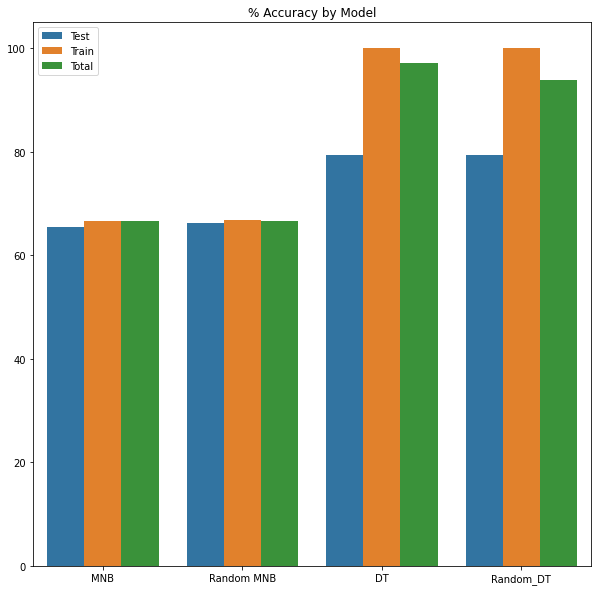

In [63]:
import seaborn
from matplotlib import pyplot

pyplot.figure(figsize = (10,10))
seaborn.barplot(data = Accuracy_DF, x = 'Model', y = '%_Accurate', hue = 'Train/Test')
pyplot.title('% Accuracy by Model')
pyplot.legend(title = None)
pyplot.xlabel('')
pyplot.ylabel('')
pyplot.show()

While we are graphing the training accuracy and total accuracy, those are usually ancillary, although related, to the testing accuracy. That said, it appears that the train/test splitting does not matter as much as the algorithm itself as all accuracies seem to be nearly-identical for each algorithm between the splitting methods. It is clear, however, that the Decision Tree algorithm is much more accurate thatn the Multinomial Naive Bayes algorithm.

One more viualization before getting to the concluding questions! Now, we will look at the accuracy by item. Bullet charts will be created for showing the number of accurate predicitions of each item vs the total number of each item in the data. Four visuals will be made, one for each model. First, in the cell below, we will create the DataFrame needed for these visualizations.

In [64]:
Label_DF = data.groupby(['Label_Description']). \
    aggregate({'Label': 'count', 'MNB_Accurate': 'sum', 'Random_MNB_Accurate': 'sum', 'DT_Accurate': 'sum', 'Random_DT_Accurate': 'sum'}) \
    [['Label', 'MNB_Accurate', 'Random_MNB_Accurate', 'DT_Accurate', 'Random_DT_Accurate']] \
    .rename(columns = {'Label': 'Total'})

Label_DF

,Total,MNB_Accurate,Random_MNB_Accurate,DT_Accurate,Random_DT_Accurate
Label_Description,,,,,
Ankle boot,7000,5825,5798,6915,6757
Bag,7000,5681,5736,6911,6822
Coat,7000,4387,4402,6650,6298
Dress,7000,6198,6197,6779,6579
Pullover,7000,4158,4152,6661,6258
Sandal,7000,1027,1045,6893,6788
Shirt,7000,1140,1116,6550,6005
Sneaker,7000,6417,6405,6889,6739
T-shirt/top,7000,5512,5516,6738,6496


Looks great! One thing we maybe should have checked earlier on is the distribution of items amongst the data. We see here that there is a exactly-uniform distribution, which makes our models that much more legitimate by taking away skew bias. Now, time for those graphs! Here, only the accuracy of the model against the entire data set (training and testing) will be calculated.

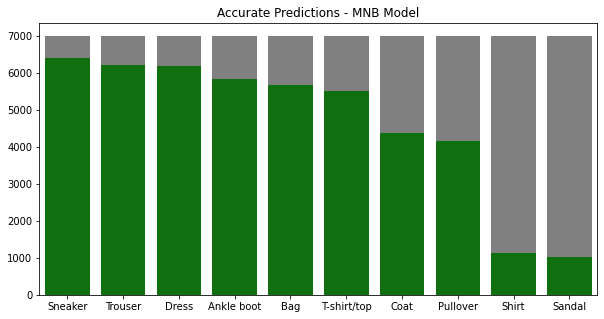

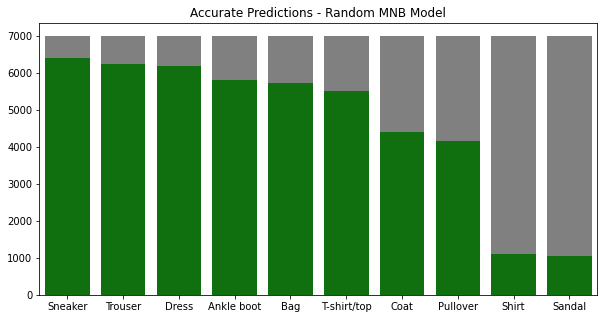

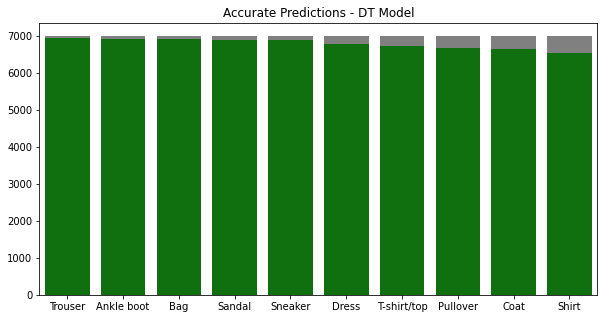

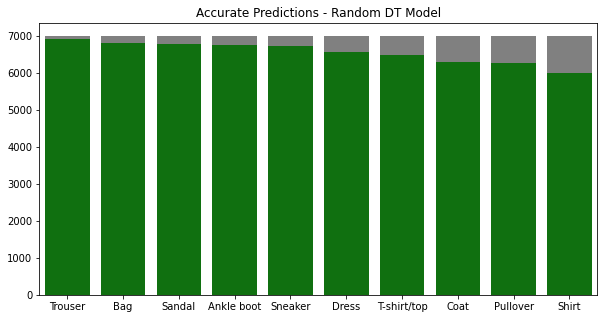

In [65]:
#Bullet chart for Accuracy by Item for MNB Model
pyplot.figure(figsize = (10,5))
seaborn.barplot(x = Label_DF.sort_values('MNB_Accurate', ascending = False).index, y = Label_DF.sort_values('MNB_Accurate', ascending = False)['Total'], palette = {'gray'})
seaborn.barplot(x = Label_DF.sort_values('MNB_Accurate', ascending = False).index, y = Label_DF.sort_values('MNB_Accurate', ascending = False)['MNB_Accurate'], palette = {'green'})
pyplot.title('Accurate Predictions - MNB Model')
pyplot.xlabel('')
pyplot.ylabel('')
pyplot.show()

#Bullet chart for Accuracy by Item for Random MNB Model
pyplot.figure(figsize = (10,5))
seaborn.barplot(x = Label_DF.sort_values('Random_MNB_Accurate', ascending = False).index, y = Label_DF.sort_values('Random_MNB_Accurate', ascending = False)['Total'], palette = {'gray'})
seaborn.barplot(x = Label_DF.sort_values('Random_MNB_Accurate', ascending = False).index, y = Label_DF.sort_values('Random_MNB_Accurate', ascending = False)['Random_MNB_Accurate'], palette = {'green'})
pyplot.title('Accurate Predictions - Random MNB Model')
pyplot.xlabel('')
pyplot.ylabel('')
pyplot.show()

#Bullet chart for Accuracy by Item for DT Model
pyplot.figure(figsize = (10,5))
seaborn.barplot(x = Label_DF.sort_values('DT_Accurate', ascending = False).index, y = Label_DF.sort_values('DT_Accurate', ascending = False)['Total'], palette = {'gray'})
seaborn.barplot(x = Label_DF.sort_values('DT_Accurate', ascending = False).index, y = Label_DF.sort_values('DT_Accurate', ascending = False)['DT_Accurate'], palette = {'green'})
pyplot.title('Accurate Predictions - DT Model')
pyplot.xlabel('')
pyplot.ylabel('')
pyplot.show()

#Bullet chart for Accuracy by Item for Random DT Model
pyplot.figure(figsize = (10,5))
seaborn.barplot(x = Label_DF.sort_values('Random_DT_Accurate', ascending = False).index, y = Label_DF.sort_values('Random_DT_Accurate', ascending = False)['Total'], palette = {'gray'})
seaborn.barplot(x = Label_DF.sort_values('Random_DT_Accurate', ascending = False).index, y = Label_DF.sort_values('Random_DT_Accurate', ascending = False)['Random_DT_Accurate'], palette = {'green'})
pyplot.title('Accurate Predictions - Random DT Model')
pyplot.xlabel('')
pyplot.ylabel('')
pyplot.show()

Very cool! Decision Trees still reign supreme. Also, we can get an idea as to what items are easiest/hardest to predict. At a quick glance, it seems the items that are most in common with others in the data are the ones that are harder to distinguish, hence lower in accurate predictions.

Finally, it is time to answer our questions!

Question 1 - What is the accuracy of each method? \
\
We will look at the Accuracy DataFrame once again to answer this question.

In [66]:
#Test Accuracy
print('TESTING DATA ACCURACY')
display(Accuracy_DF[Accuracy_DF['Train/Test'] == 'Test'].sort_values('%_Accurate', ascending = False).reset_index(drop = True))

#Train Accuracy
print()
print('TRAINING DATA ACCURACY')
display(Accuracy_DF[Accuracy_DF['Train/Test'] == 'Train'].sort_values('%_Accurate', ascending = False).reset_index(drop = True))

#All Data Accuracy
print()
print('ALL DATA ACCURACY')
display(Accuracy_DF[Accuracy_DF['Train/Test'] == 'Total'].sort_values('%_Accurate', ascending = False).reset_index(drop = True))

TESTING DATA ACCURACY


,Model,Train/Test,%_Accurate
0,DT,Test,79.35
1,Random_DT,Test,79.29
2,Random MNB,Test,66.16
3,MNB,Test,65.54



TRAINING DATA ACCURACY


,Model,Train/Test,%_Accurate
0,DT,Train,100.00
1,Random_DT,Train,100.00
2,Random MNB,Train,66.75
3,MNB,Train,66.70



ALL DATA ACCURACY


,Model,Train/Test,%_Accurate
0,DT,Total,97.05
1,Random_DT,Total,93.79
2,Random MNB,Total,66.57
3,MNB,Total,66.53


No matter how it is broken down, Decision Tree is the better method. While limited experimentation on the train/test splitting methods, that does not seem to matter too much. That said, the training proportion was much larger for the pre-defined splitting than the random splitting, which could potentially be causing over-fitting to the training data. More expereimentation with the splitting methods and training proportions, while narrowing down to just using Decision Trees, would likley be the next step for creating an optimized model.

Question 2 - What are the trade-offs of each approach? \
\
Each approach has pros and cons. Some of the more obvious ones are as follows. \
\
&nbsp;&nbsp;&nbsp;&nbsp;Multinomial Naive Bayes - Pre-Defined Splitting \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Pros: Fast Training, No need to radnomly split \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Cons: Relatively Low Accuracy \
\
&nbsp;&nbsp;&nbsp;&nbsp;Multinomial Naive Bayes - Random Splitting \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Pros: Fast Training \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Cons: Relatively Low Accuracy, Need to randomly split \
\
&nbsp;&nbsp;&nbsp;&nbsp;Decision Trees - Pre-Defined Splitting \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Pros: High Accuracy, No need to radnomly split \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Cons: Slow Training \
\
&nbsp;&nbsp;&nbsp;&nbsp;Decision Trees - Random Splitting \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Pros: High Accuracy \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Cons: Slow Training, Need to randomly split

Question 3 - What is the compute performance of each approach? \
\
Looking back to the cells where models were trained, it looks like both Multinomial Naive Bayes models took about 5 seconds each and the Decision Tree models took about 35 seconds each. I would say 30 extra seconds is worth the substaintial improvement in accuracy. Support Vector Machines were attempted using both RBF and linear kernels, but they were aborted after many minutes of training. The long training times were likley due to the large number of columns making each support vector difficult to create. That said, it would be interesting to see how support vector machines perform on these data in a situation where more time (and most patience on my end) is available. 

End of Lab 3.